In [84]:
import datetime
from datetime import datetime
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats

plt.style.use('seaborn')


import missingno as msno
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [85]:
df_train= pd.read_csv('../input/train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('../input/test.csv', parse_dates=['datetime'])


In [86]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


# 전체 데이터 EDA

In [88]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [89]:
# Train 과 Test data의 Null값 확인

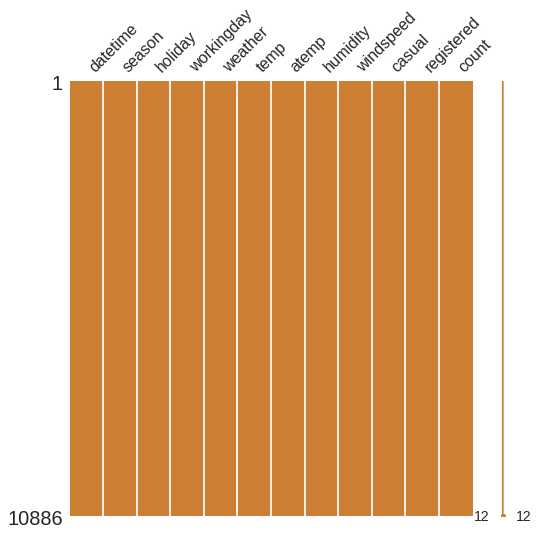

In [90]:
msno.matrix(df= df_train.iloc[: , :],figsize=(8,8), color = (0.8,0.5,0.2))

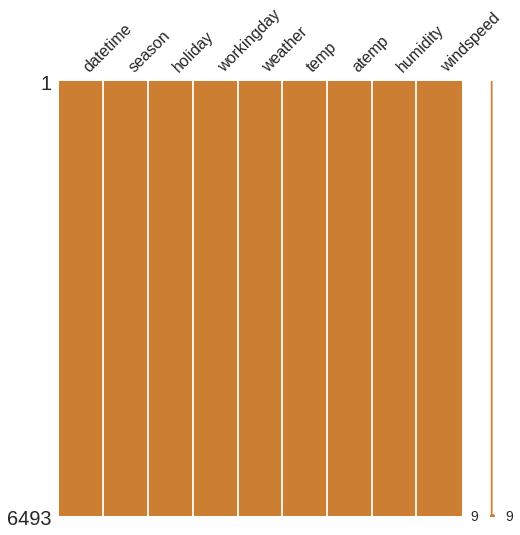

In [91]:
msno.matrix(df= df_test.iloc[: , :],figsize=(8,8), color = (0.8,0.5,0.2))

In [92]:
df_train['year']=df_train['datetime'].dt.year
df_train['month']=df_train['datetime'].dt.month
df_train['hour']=df_train['datetime'].dt.hour
df_train['weekday']=df_train['datetime'].dt.dayofweek

In [93]:
df_test['year']=df_test['datetime'].dt.year
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour
df_test['weekday']=df_test['datetime'].dt.dayofweek

In [94]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,9,5


In [95]:
#df_train.drop(['datetime'], axis=1, inplace=True)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

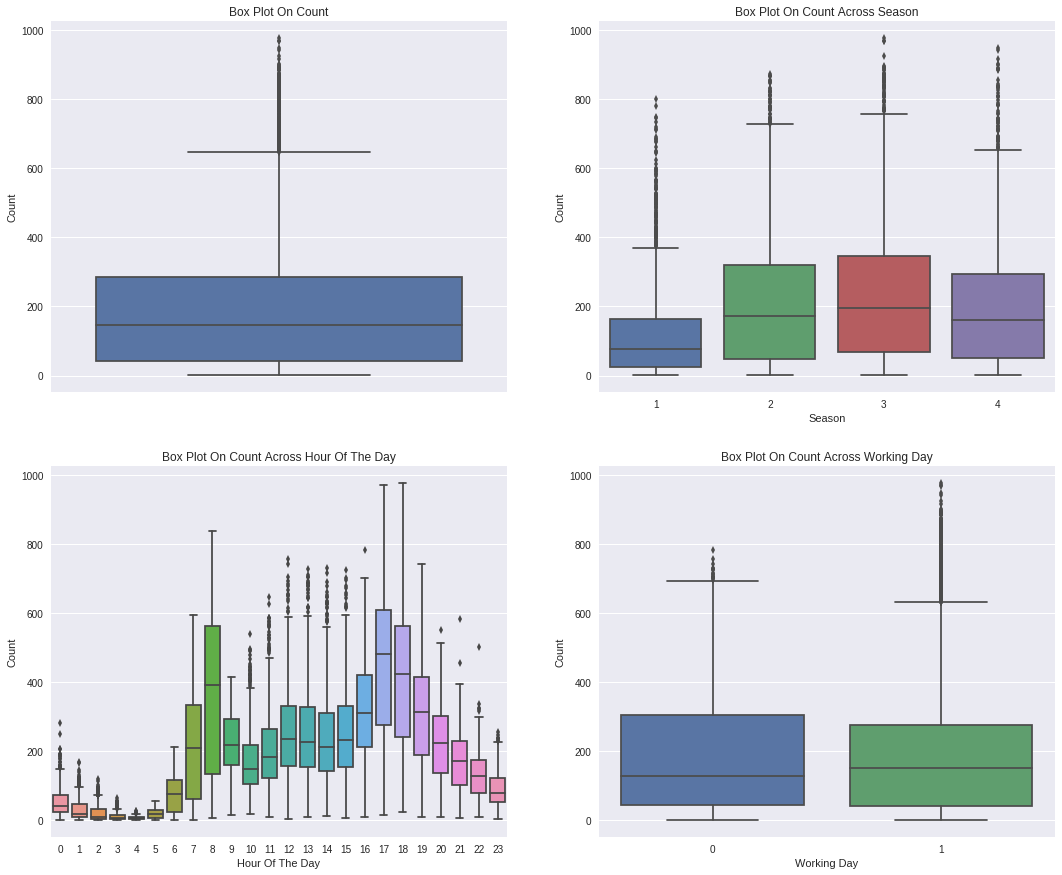

In [96]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 15)
sns.boxplot(data=df_train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df_train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df_train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [97]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))

In [98]:
### 유니크 갯수 계산
train_unique = []
columns = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']

for i in columns:
    train_unique.append(len(df_train[i].unique()))
unique_train = pd.DataFrame()
unique_train['Columns'] = columns
unique_train['Unique_value'] = train_unique

data = [
    go.Bar(
        x = unique_train['Columns'],
        y = unique_train['Unique_value'],
        name = 'Unique value in features',
        textfont=dict(size=20),
        marker=dict(
        line=dict(
            color= generate_color(),
            #width= 2,
        ), opacity = 0.45
    )
    ),
    ]
layout= go.Layout(
        title= "Unique Value By Column",
        xaxis= dict(title='Columns', ticklen=5, zeroline=False, gridwidth=2),
        yaxis= dict(title='Value Count', ticklen=5, gridwidth=2),
        showlegend=True
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='skin')

In [99]:
df_train['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

# 개별 Columns EDA

### Season

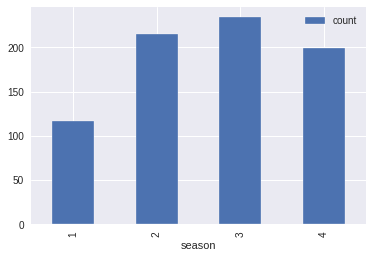

In [100]:
df_train[['season','count']].groupby(['season'], as_index=True).mean().plot.bar()

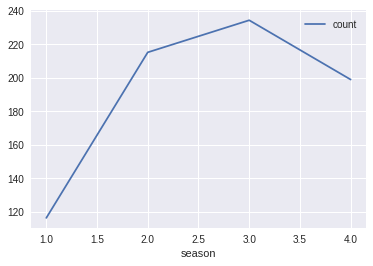

In [101]:
df_train[['season','count']].groupby(['season'], as_index=True).mean().plot()

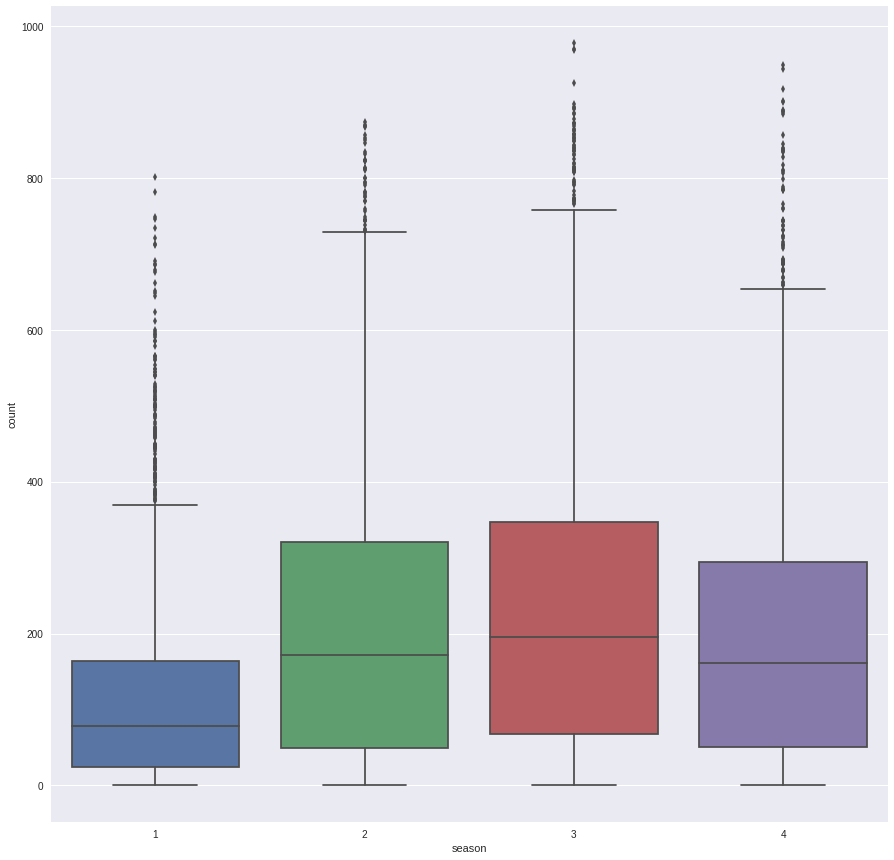

In [102]:
data = pd.concat([df_train['count'], df_train['season']], axis=1)
f, ax = plt.subplots(figsize=(15,15))
fig = sns.boxplot(x='season', y="count", data=data)

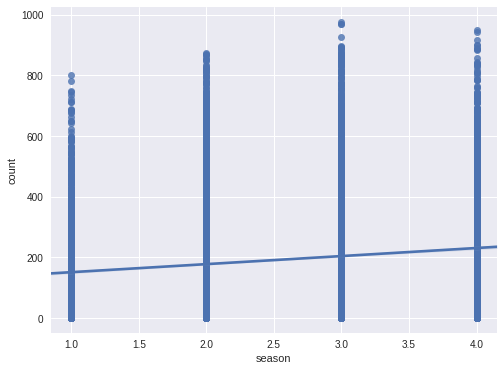

In [103]:
data = pd.concat([df_train['count'], df_train['season']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='season', y="count", data=data)

In [104]:
df_train.loc[df_train['count'] > 800]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,18,0
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,17,3
7281,2012-05-02 18:00:00,2,0,1,1,22.96,26.515,73,15.0013,43,770,813,2012,5,18,2
7616,2012-05-16 17:00:00,2,0,1,1,29.52,33.335,51,12.9980,104,769,873,2012,5,17,2
7617,2012-05-16 18:00:00,2,0,1,1,29.52,33.335,51,15.0013,97,749,846,2012,5,18,2
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,3
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,18,3
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,17,4
7784,2012-06-04 17:00:00,2,0,1,1,26.24,31.060,38,30.0026,101,733,834,2012,6,17,0
7785,2012-06-04 18:00:00,2,0,1,1,26.24,31.060,38,26.0027,103,719,822,2012,6,18,0


### Weather

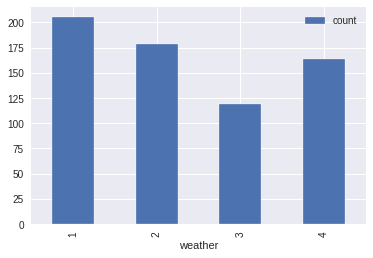

In [105]:
df_train[['weather','count']].groupby(['weather'], as_index=True).mean().plot.bar()

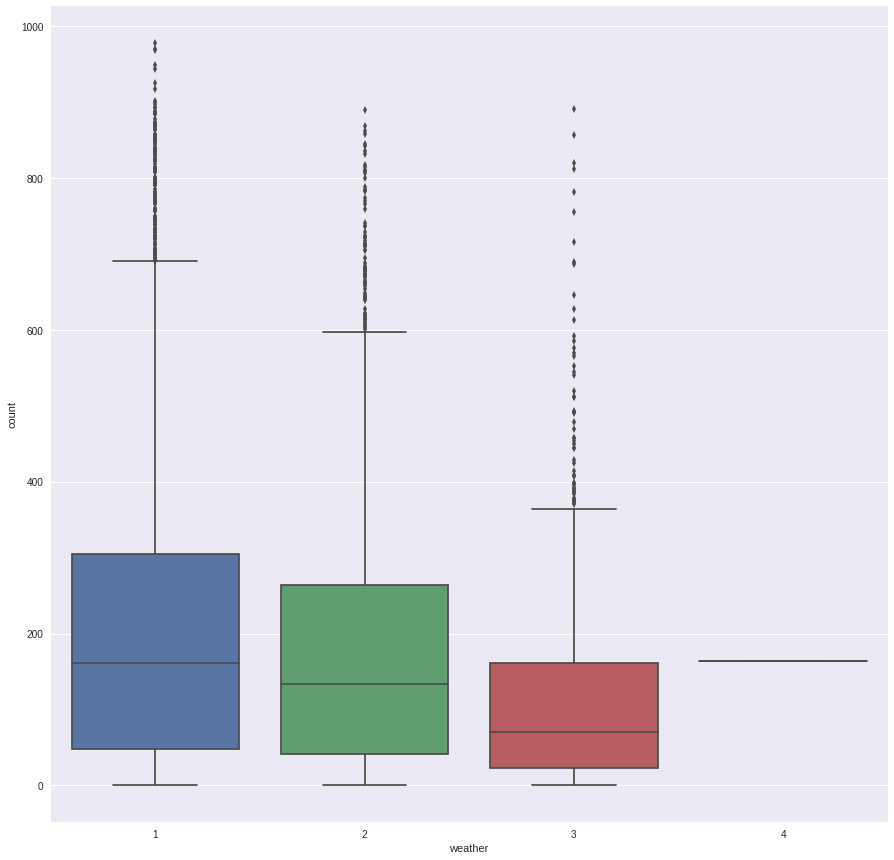

In [106]:
data = pd.concat([df_train['count'], df_train['weather']], axis=1)
f, ax = plt.subplots(figsize=(15,15))
fig = sns.boxplot(x='weather', y="count", data=data)

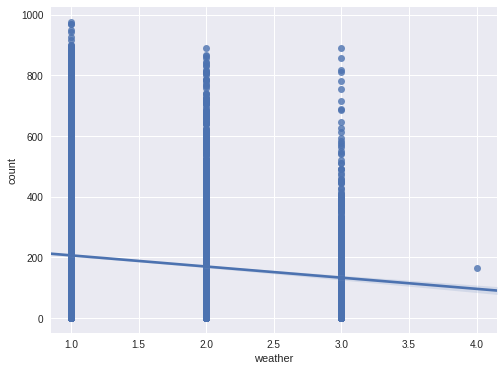

In [107]:
data = pd.concat([df_train['count'], df_train['weather']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='weather', y="count", data=data)

In [108]:
df_train.loc[df_train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,18,0


> # 연속형변수 (temp,atemp,humidity,windspeed)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'humidity'), Text(0.5, 1.0, 'humidity')]

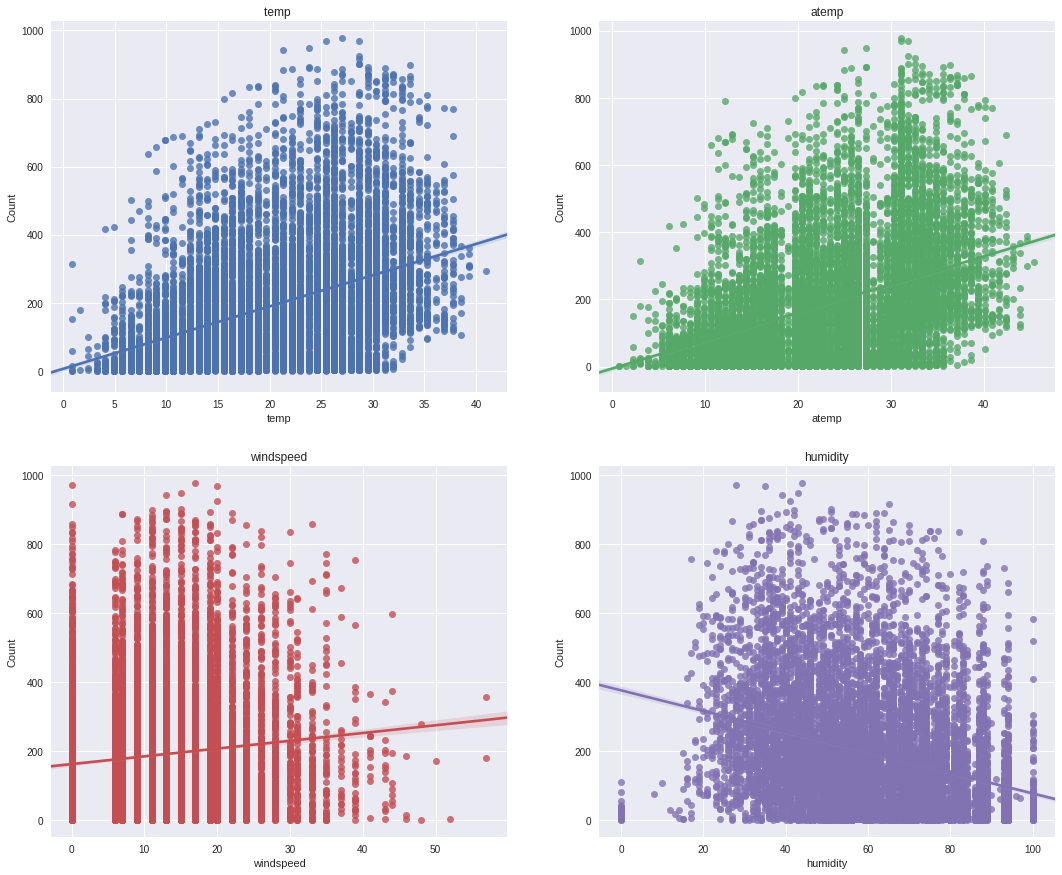

In [109]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 15)
sns.regplot(x='temp', y='count', data=df_train,ax=axes[0][0])
sns.regplot(x='atemp', y='count', data=df_train,ax=axes[0][1])
sns.regplot(x='windspeed', y='count', data=df_train,ax=axes[1][0])
sns.regplot(x='humidity', y='count', data=df_train,ax=axes[1][1])

axes[0][0].set(xlabel='temp',ylabel='Count',title='temp ')
axes[0][1].set(xlabel='atemp', ylabel='Count',title='atemp')
axes[1][0].set(xlabel='windspeed', ylabel='Count',title='windspeed')
axes[1][1].set(xlabel='humidity', ylabel='Count',title='humidity')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'humidity'),
 Text(0.5, 1.0, "['Humidity', 'Skewness: 0.003691', 'Kurtosis: -0.759818']")]

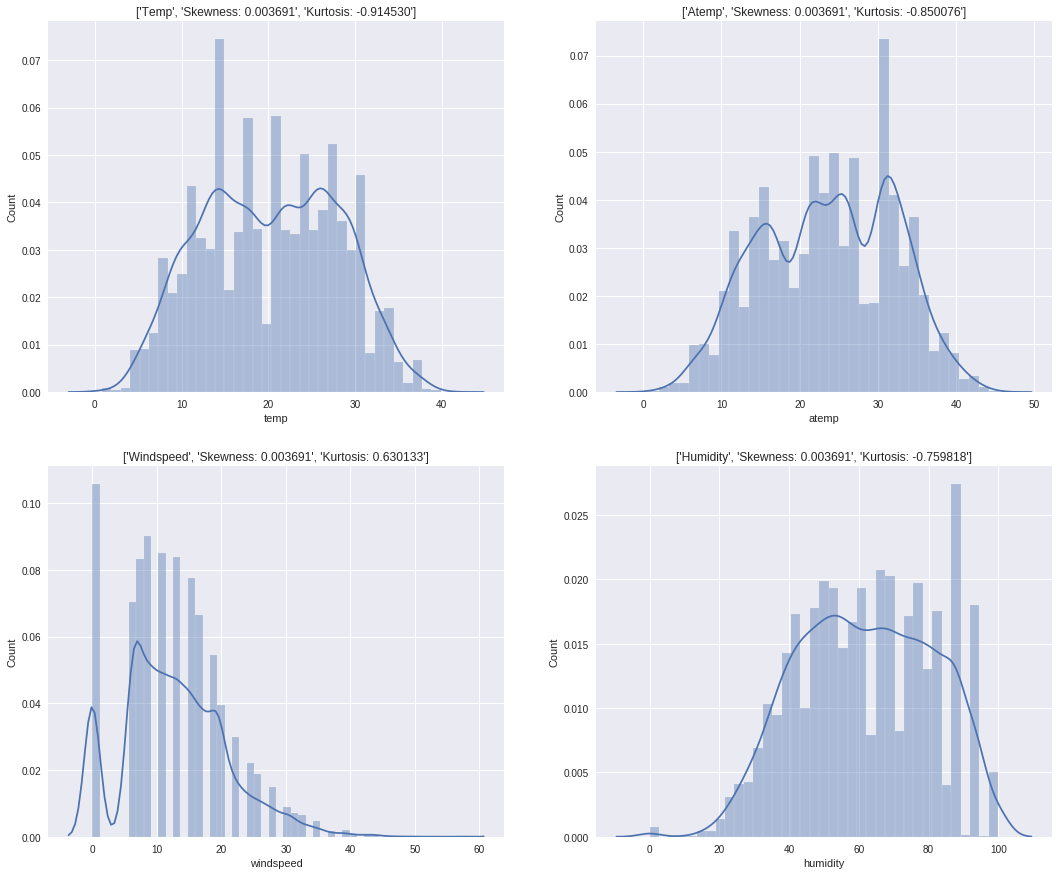

In [110]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 15)


sns.distplot(df_train['temp'],ax=axes[0][0] )
sns.distplot(df_train['atemp'],ax=axes[0][1])
sns.distplot(df_train['windspeed'],ax=axes[1][0])
sns.distplot(df_train['humidity'],ax=axes[1][1])


axes[0][0].set(xlabel='temp',ylabel='Count',title=['Temp',("Skewness: %f" % df_train['temp'].skew()),("Kurtosis: %f" % df_train['temp'].kurt())])


axes[0][1].set(xlabel='atemp', ylabel='Count',title=['Atemp',("Skewness: %f" % df_train['temp'].skew()),("Kurtosis: %f" % df_train['atemp'].kurt())])
axes[1][0].set(xlabel='windspeed', ylabel='Count',title=['Windspeed',("Skewness: %f" % df_train['temp'].skew()),("Kurtosis: %f" % df_train['windspeed'].kurt())])
axes[1][1].set(xlabel='humidity', ylabel='Count',title=['Humidity',("Skewness: %f" % df_train['temp'].skew()),("Kurtosis: %f" % df_train['humidity'].kurt())])

> # Target변수

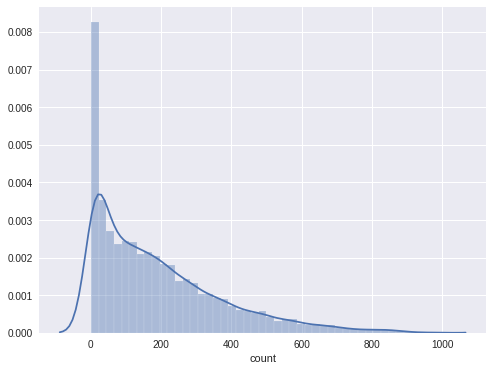

In [111]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['count'])

In [112]:
df_train.loc[df_train['count'] < 10]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,8,5
26,2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,1,8,9,2011,1,2,6
27,2011-01-02 03:00:00,1,0,0,2,18.86,22.725,94,12.9980,2,4,6,2011,1,3,6
28,2011-01-02 04:00:00,1,0,0,2,18.86,22.725,94,12.9980,2,1,3,2011,1,4,6
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,2,2,2011,1,6,6
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,2011,1,7,6


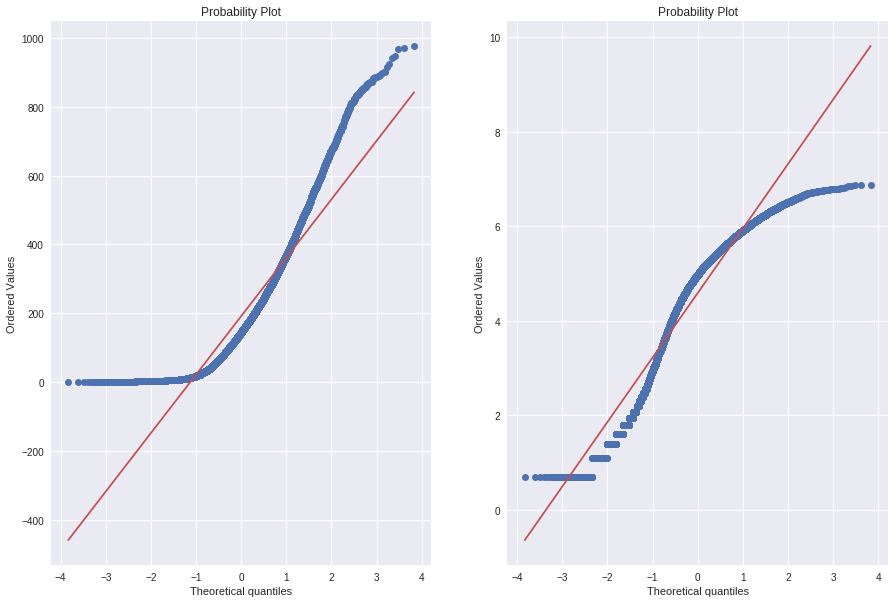

In [113]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['count'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['count']), plot=plt)

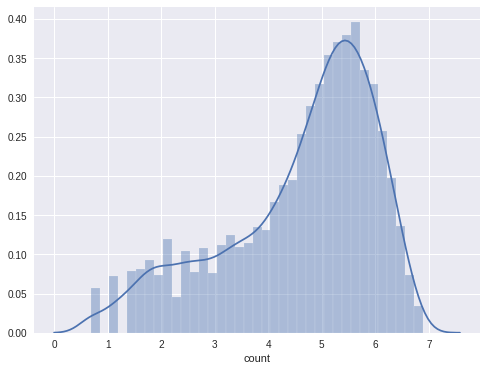

In [114]:
df_train['count'] = np.log1p(df_train['count'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['count'])

['count' 'registered' 'casual' 'hour' 'temp' 'atemp' 'humidity' 'year'
 'month' 'season']


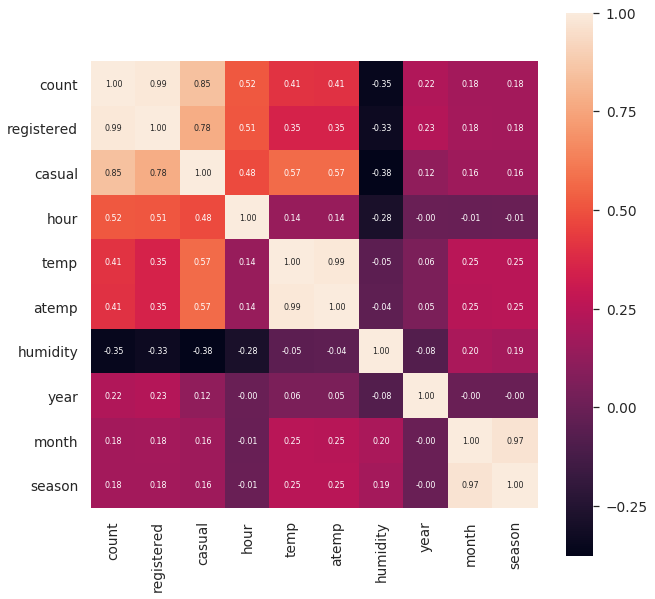

In [115]:
# correlation이 높은 상위 10개의 heatmap
# continuous + sequential variables --> spearman
# abs는 반비례관계도 고려하기 위함
# https://www.kaggle.com/junoindatascience/let-s-eda-it 준호님이 수정해 준 코드로 사용하였습니다. 
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='count').index # count과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

# Model

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [117]:
#df_test['date']  = df_test.datetime.apply(lambda x: x.split()[0])
#df_test['hour'] = df_test.datetime.apply(lambda x: x.split()[1].split(':')[0])
#df_test['weekday'] = df_test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
#df_test['month'] = df_test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
#df_test['year']=[d.split('-')[0] for d in df_test.date]
#df_test['day']=[d.split('-')[2] for d in df_test.date]

In [118]:
df_train_care=df_train[['casual','registered']]
del df_train['casual']
del df_train['registered']

In [119]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,2.833213,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.713572,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.496508,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,2.639057,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.693147,2011,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.693147,2011,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,1.098612,2011,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1.386294,2011,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,2.197225,2011,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,2.708050,2011,1,9,5


In [120]:
target_label = df_train['count']

del df_train['count']

In [121]:
train_len = len(df_train)
df_train = pd.concat((df_train, df_test), axis=0)

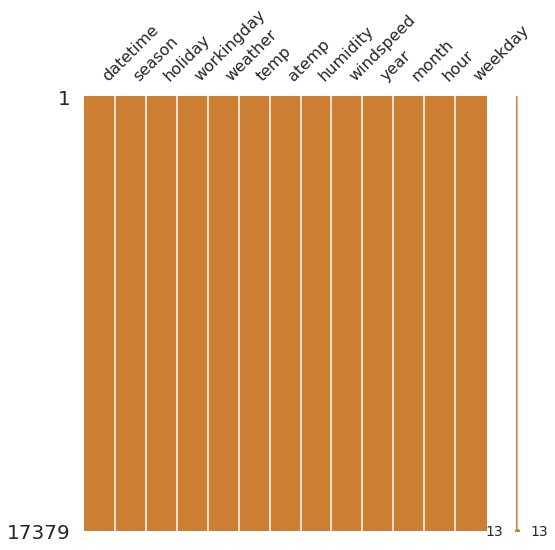

In [122]:
msno.matrix(df= df_train.iloc[: , :],figsize=(8,8), color = (0.8,0.5,0.2))

In [123]:
df_test_datetime=df_train['datetime'][train_len:]

In [124]:
## 여기서부터 컬럼 형태바꾸고 필요없는 컬럼 drop
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                   int64
month                  int64
hour                   int64
weekday                int64
dtype: object

In [125]:
from sklearn.preprocessing import  LabelEncoder
encoder =LabelEncoder()

In [126]:
for i in ['season','holiday','month','weather','weekday','workingday']:
    encoder.fit(df_train[i])
    df_train[i]=encoder.transform(df_train[i])

In [127]:
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                   int64
month                  int64
hour                   int64
weekday                int64
dtype: object

In [129]:
#불필요한 컬럼 제거 
df_train=df_train.drop(['year','datetime'],axis=1)

In [131]:
df_test = df_train.iloc[train_len:, :]
df_train = df_train.iloc[:train_len, :]

In [132]:
X_train = df_train.values
# target_label은 들어 가있으니까 그대로 유지
X_test = df_test.values
# array형태로 넣어주려고 values 사용

In [133]:
lgbm=LGBMRegressor()
xgb=XGBRegressor()

In [134]:
xgb.fit(df_train,target_label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [135]:
lgbm.fit(df_train,target_label)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [136]:
lgbm_pred = np.expm1(lgbm.predict(df_test))
xgb_pred=np.expm1(xgb.predict(df_test))

In [137]:
preds=0.5*xgb_pred + 0.5*lgbm_pred

In [138]:
df_test.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,weekday
0,0,0,1,0,10.66,11.365,56,26.0027,0,0,3
1,0,0,1,0,10.66,13.635,56,0.0000,0,1,3
2,0,0,1,0,10.66,13.635,56,0.0000,0,2,3
3,0,0,1,0,10.66,12.880,56,11.0014,0,3,3
4,0,0,1,0,10.66,12.880,56,11.0014,0,4,3
5,0,0,1,0,9.84,11.365,60,15.0013,0,5,3
6,0,0,1,0,9.02,10.605,60,15.0013,0,6,3
7,0,0,1,0,9.02,10.605,55,15.0013,0,7,3
8,0,0,1,0,9.02,10.605,55,19.0012,0,8,3
9,0,0,1,1,9.84,11.365,52,15.0013,0,9,3


In [139]:
type(df_test_datetime)

pandas.core.series.Series

In [140]:
sub = pd.DataFrame(data={'datetime':df_test_datetime,'count':preds})

In [141]:
sub.to_csv('submission.csv',index=False)